# **Practice 3: Trajectory planning**

Prepared by: **Albert Demian** 

Email: **a.demian@innopolis.university**

Telegram: **@albertdemian**


## Topics covered: 
---

1. Planning single trajectory
1. synchronization of different joint trajectories 
 





In [ ]:
import numpy as np
from numpy import pi
from matplotlib.pyplot import *


## Taking one joint trajectory
---


Motion parameters: 
\begin{equation}
p = [q_0 , q_f, \dot q_{max}, \ddot q_{max}]
\end{equation}

we can calculate trajectory time: 

for acceleration and deceleration time: 

\begin{equation}
\tau = \frac{\dot q_{max}}{\ddot q_{max}} \\
\end{equation}

for dwelling time: 
\begin{equation}
T = \frac{\Delta{q}}{\dot q_{max}} \\
\Delta q = q_f - q_0 
\end{equation}

check the type of velocity profile: 

**profile is triangular if:** 
\begin{equation}
\sqrt{\Delta q . \ddot q_{max}} \leq \dot q_{max}
\end{equation}

Valocity profile becomes: 
\begin{equation}
v(t) = \begin{cases}
\dot q_0 + \ddot q_{max} t &  t_0 \leq t \leq \tau \\
q_0 + \dot q_0 (t-\tau)  & \tau \leq t \leq T \\
\dot q_0 + \ddot q_{max} (t-t_f) & t \leq T+\tau  
\end{cases}
\end{equation}

rise time: 2.0, dwel time: 9.25, drop time: 2.0, total time: 13.25


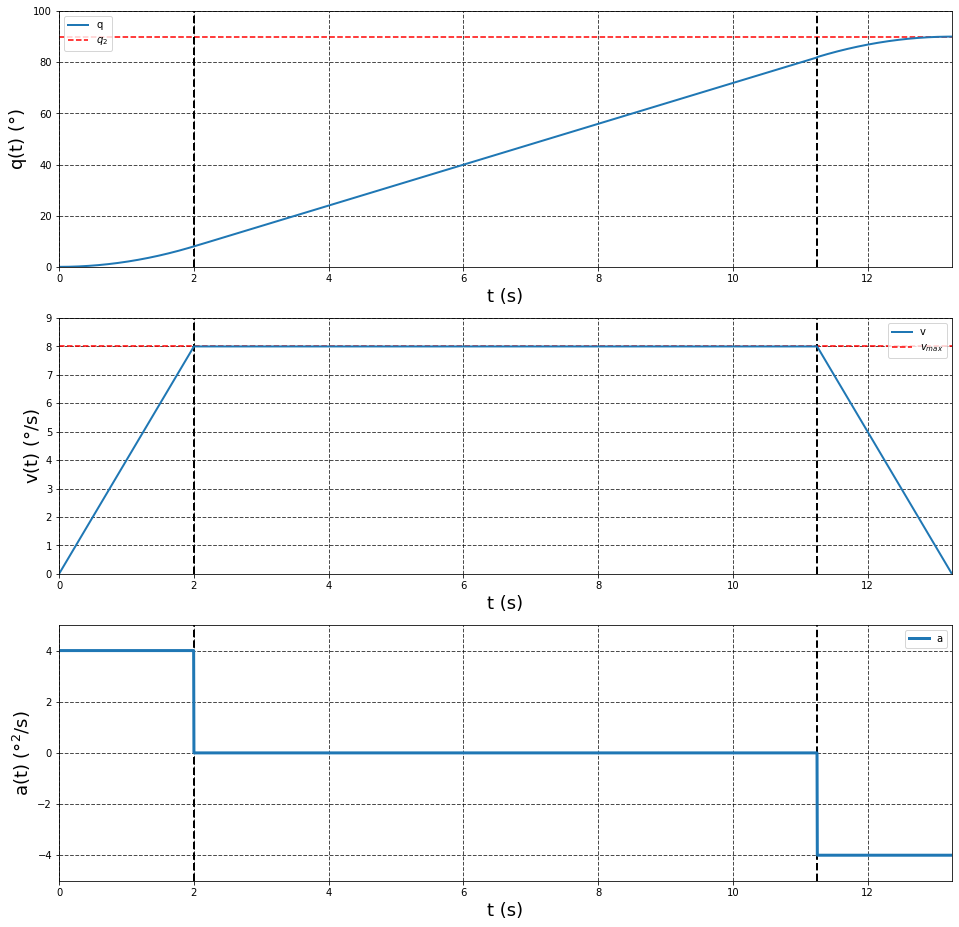

In [77]:
#conditions 

q0 = 0 
qf = 90

dq = qf-q0
dq_m = 8
ddq_m = 4

t0 = 0 

#triangular check 
c = np.sqrt(dq*ddq_m) 

if c <= dq_m: 
  t1 = np.sqrt(dq/ddq_m)
  T = t1
  tf = 2*t1
else: 
  t1 = dq_m/ddq_m
  T = dq/dq_m
  tf = T+t1 

print( 'rise time: {}, dwel time: {}, drop time: {}, total time: {}'.format(t1, T-t1, tf-T, tf))

t = np.linspace(t0,tf, int(3E3))

q = []
v = []
a = []

for i in t: 

  if i <=t1:
    qi = q0 + (0.5*ddq_m*(i-t0)**2)
    q02 = qi
    vi = ddq_m*i
    v02 = vi 
    ai = ddq_m
    
  elif i > t1 and i <= T: 
    vi = dq_m
    qi =  q02 + v02*(i-t1)
    ai = 0 
    
  elif i > T: 
    vi = ddq_m*(tf-i)
    qi = qf - (0.5*ddq_m*(i-tf)**2)
    ai = -ddq_m

  q.append(qi)
  v.append(vi) 
  a.append(ai)



figure(figsize=(16,16))
subplot(312)
plot(t,v, linewidth=2, label="v")
xlabel('t (s)', fontsize=18)
ylabel(r'v(t) ($\degree$/s)', fontsize=18)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0,tf])
ylim([0,max(v)+1])
hlines(dq_m, 0,tf, linestyles='--', color='r', label=r"$v_{max}$")
vlines([t1,T], 0, max(q), linestyles='--', linewidth=2)
legend()

subplot(311)
plot(t,q, linewidth=2, label="q")
xlabel('t (s)', fontsize=18)
ylabel(r'q(t) ($\degree$)', fontsize=18)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0,tf])
ylim([0,max(q)+10])
hlines(qf, 0,tf, linestyles='--', color='r', label=r"$q_{2}$")
vlines([t1,T], 0, max(q)+10, linestyles='--', linewidth=2)
legend()


subplot(313)
plot(t,a, linewidth=3, label="a")
xlabel('t (s)', fontsize=18)
ylabel(r'a(t) ($\degree^2$/s)', fontsize=18)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0,tf])
ylim([min(a)-1,max(a)+1])
vlines([t1,T], min(a)-1, max(a)+1, linestyles='--', linewidth=2)
legend()


show()







rise time: 2.0, dwel time: 2.375, drop time: 2.0, total time: 6.375


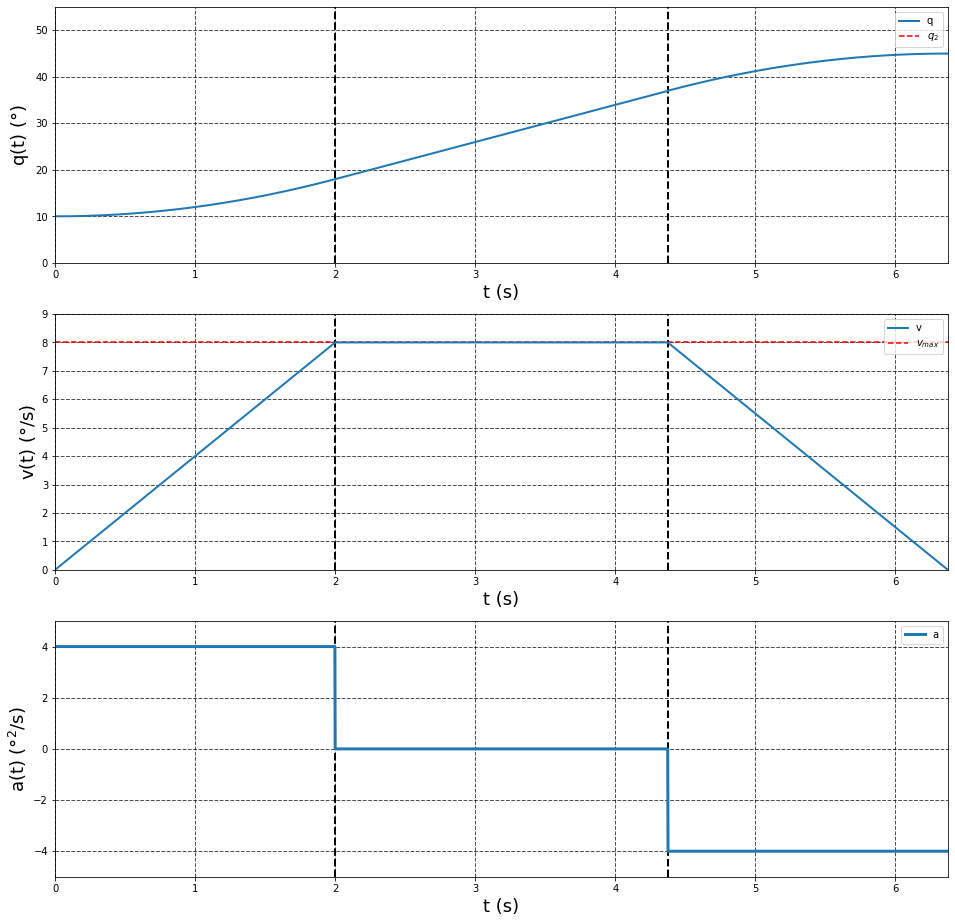

In [99]:
#put that in functions

def trajectory_time(params, t0 = 0): 
  q0,qf,dq_m,ddq_m = params

  dq = qf-q0
  #triangular check 
  c = np.sqrt(dq*ddq_m) 

  if c <= dq_m: 
    t1 = np.sqrt(dq/ddq_m)
    T = t1
    tf = 2*t1
  else: 
    t1 = dq_m/ddq_m
    T = dq/dq_m
    tf = T+t1 
  
  return t0,t1,T,tf 

_,t1,T,tf = trajectory_time([10,45,8,4])
print( 'rise time: {}, dwel time: {}, drop time: {}, total time: {}'.format(t1, T-t1, tf-T, tf))



def plan_trajectory(q_params, t_params):
  t0,t1,T,tf = t_params
  q0,qf,dq_m,ddq_m = q_params 
  t = np.linspace(t0,tf, int(3E3))
  q = []
  v = []
  a = []

  for i in t: 

    if i <=t1:
      qi = q0 + (0.5*ddq_m*(i-t0)**2)
      q02 = qi
      vi = ddq_m*i
      v02 = vi 
      ai = ddq_m
      
    elif i > t1 and i <= T: 
      vi = dq_m
      qi =  q02 + v02*(i-t1)
      ai = 0 
      
    elif i > T: 
      vi = ddq_m*(tf-i)
      qi = qf - (0.5*ddq_m*(i-tf)**2)
      ai = -ddq_m

    q.append(qi)
    v.append(vi) 
    a.append(ai)

  return t, q, v, a

t,q,v,a = plan_trajectory([10,45, 8,4],(t0,t1,T,tf))



figure(figsize=(16,16))
subplot(312)
plot(t,v, linewidth=2, label="v")
xlabel('t (s)', fontsize=18)
ylabel(r'v(t) ($\degree$/s)', fontsize=18)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0,tf])
ylim([0,max(v)+1])
hlines(dq_m, 0,tf, linestyles='--', color='r', label=r"$v_{max}$")
vlines([t1,T], 0, max(q), linestyles='--', linewidth=2)
legend()

subplot(311)
plot(t,q, linewidth=2, label="q")
xlabel('t (s)', fontsize=18)
ylabel(r'q(t) ($\degree$)', fontsize=18)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0,tf])
ylim([0,max(q)+10])
hlines(qf, 0,tf, linestyles='--', color='r', label=r"$q_{2}$")
vlines([t1,T], 0, max(q)+10, linestyles='--', linewidth=2)
legend()


subplot(313)
plot(t,a, linewidth=3, label="a")
xlabel('t (s)', fontsize=18)
ylabel(r'a(t) ($\degree^2$/s)', fontsize=18)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0,tf])
ylim([min(a)-1,max(a)+1])
vlines([t1,T], min(a)-1, max(a)+1, linestyles='--', linewidth=2)
legend()


show()

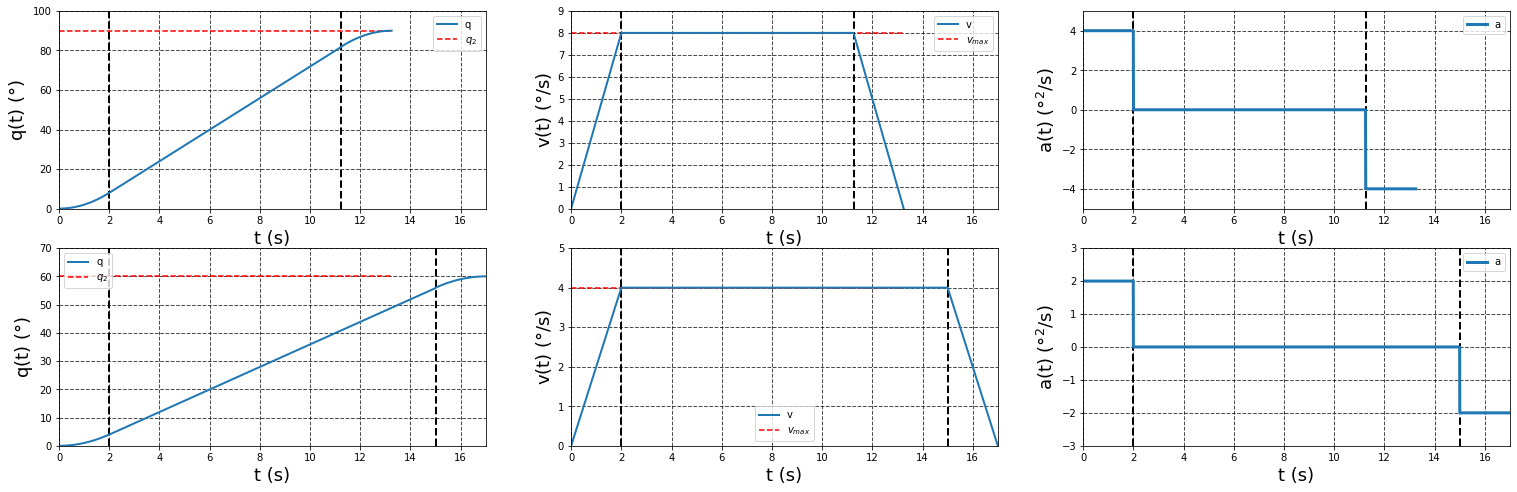

In [170]:
# params [q0,qf,dq_m, ddq_m]
j1 = [0,90,8,4]
j2 = [0,60,4,2]

t0=0 

#calculate trajectory time for each
j1_t = trajectory_time(j1)
j2_t = trajectory_time(j2)


#calculate each trajectory
T1,q1,v1,a1 = plan_trajectory(j1,j1_t)
T2,q2,v2,a2 = plan_trajectory(j2,j2_t)

#extract time params for plotting
_,t11,T11,tf1 = j1_t
_,t12,T12,tf2 = j2_t

figure(figsize=(26,8))
subplot(232)
plot(T1,v1, linewidth=2, label="v")
xlabel('t (s)', fontsize=18)
ylabel(r'v(t) ($\degree$/s)', fontsize=18)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0,max(tf1,tf2)])
ylim([0,max(v1)+1])
hlines(j1[2], 0,tf1, linestyles='--', color='r', label=r"$v_{max}$")
vlines([t11,T11], 0, max(q1), linestyles='--', linewidth=2)
legend()

subplot(231)
plot(T1,q1, linewidth=2, label="q")
xlabel('t (s)', fontsize=18)
ylabel(r'q(t) ($\degree$)', fontsize=18)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0,max(tf1,tf2)])
ylim([0,max(q1)+10])
hlines(j1[1], 0,tf1, linestyles='--', color='r', label=r"$q_{2}$")
vlines([t11,T11], 0, max(q1)+10, linestyles='--', linewidth=2)
legend()


subplot(233)
plot(T1,a1, linewidth=3, label="a")
xlabel('t (s)', fontsize=18)
ylabel(r'a(t) ($\degree^2$/s)', fontsize=18)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0,max(tf1,tf2)])
ylim([min(a1)-1,max(a1)+1])
vlines([t11,T11], min(a1)-1, max(a1)+1, linestyles='--', linewidth=2)
legend()

subplot(235)
plot(T2,v2, linewidth=2, label="v")
xlabel('t (s)', fontsize=18)
ylabel(r'v(t) ($\degree$/s)', fontsize=18)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0,max(tf1,tf2)])
ylim([0,max(v2)+1])
hlines(j2[2], 0,tf1, linestyles='--', color='r', label=r"$v_{max}$")
vlines([t12,T12], 0, max(q2), linestyles='--', linewidth=2)
legend()

subplot(234)
plot(T2,q2, linewidth=2, label="q")
xlabel('t (s)', fontsize=18)
ylabel(r'q(t) ($\degree$)', fontsize=18)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0,max(tf1,tf2)])
ylim([0,max(q2)+10])
hlines(j2[1], 0,tf1, linestyles='--', color='r', label=r"$q_{2}$")
vlines([t12,T12], 0, max(q2)+10, linestyles='--', linewidth=2)
legend()


subplot(236)
plot(T2,a2, linewidth=3, label="a")
xlabel('t (s)', fontsize=18)
ylabel(r'a(t) ($\degree^2$/s)', fontsize=18)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0,max(tf1,tf2)])
ylim([min(a2)-1,max(a2)+1])
vlines([t12,T12], min(a2)-1, max(a2)+1, linestyles='--', linewidth=2)
legend()

show()



In [172]:
#synchronization 

#refine time parameters

t1 = max(t11,t12)
print("J1 rise time: {}s, J2 rise time: {}s, synchronized rise time: {}s".format(t11,t12,t1))
dwell = max(T11-t11, T12-t12)
print("J1 dwell time: {}s, J2 dwell time: {}s, synchronized dwell time: {}s".format(T11-t11, T12-t12, dwell))
T = dwell+t1
tf = T + t1
print("Synchronized trajectory time = {} + {} + {} = {}s".format(t1,dwell,t1,tf))

t_params = [t0,t1,T, tf]
#recalculate velocity parameters
dq1_m = (j1[1]-j1[0])/T
dq2_m = (j2[1]-j2[0])/T

#recalculate acceleration parameters
ddq1_m = dq1_m/t1
ddq2_m = dq2_m/t1


print("Joint 1 velocity modified from {} to {} and acceleration from {} to {}".format(j1[2], dq1_m, j1[3], ddq1_m))
print("Joint 2 velocity modified from {} to {} and acceleration from {} to {}".format(j2[2], dq2_m, j2[3], ddq2_m))

#update parameters 
j1[2:] = [dq1_m, ddq1_m]
j2[2:] = [dq2_m, ddq2_m]


J1 rise time: 2.0s, J2 rise time: 2.0s, synchronized rise time: 2.0s
J1 dwell time: 9.25s, J2 dwell time: 13.0s, synchronized dwell time: 13.0s
Synchronized trajectory time = 2.0 + 13.0 + 2.0 = 17.0s
Joint 1 velocity modified from 6.0 to 6.0 and acceleration from 3.0 to 3.0
Joint 2 velocity modified from 4.0 to 4.0 and acceleration from 2.0 to 2.0


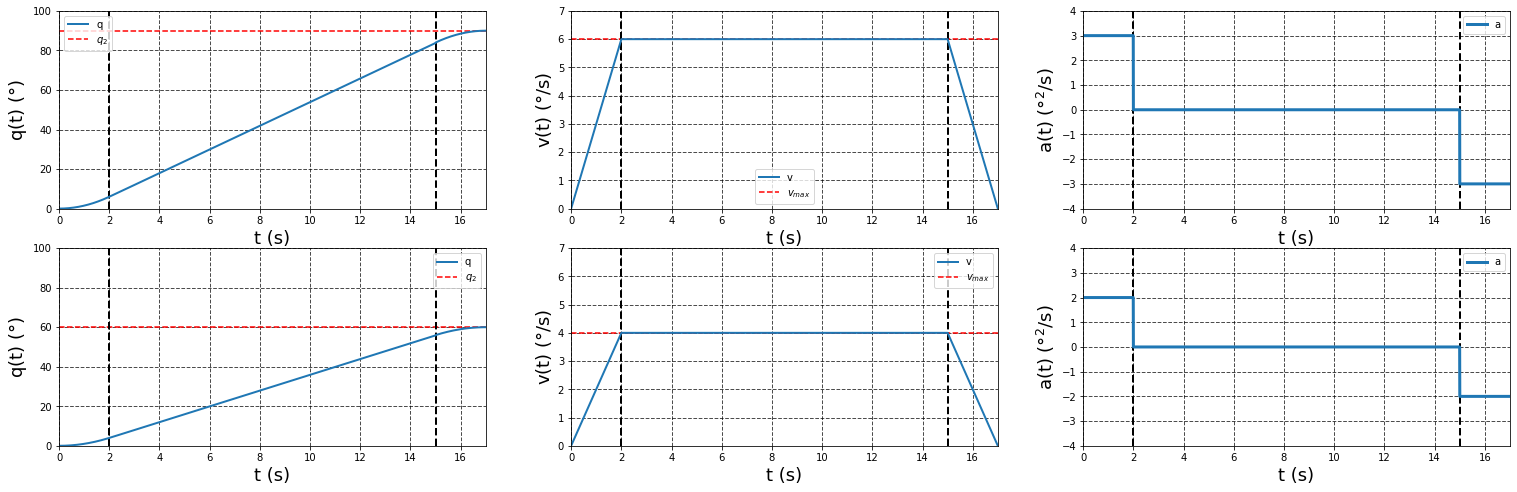

In [186]:
#calculate new trajectory

#calculate each trajectory
T1,q1,v1,a1 = plan_trajectory(j1,t_params)
T2,q2,v2,a2 = plan_trajectory(j2,t_params)

#extract time params for plotting
_,t11,T11,tf1 = t_params
_,t12,T12,tf2 = t_params

q_max = max(max(q1), max(q2))
v_max = max(max(v1), max(v2))
a_max = max(max(a1), max(a2))



figure(figsize=(26,8))
subplot(232)
plot(T1,v1, linewidth=2, label="v")
xlabel('t (s)', fontsize=18)
ylabel(r'v(t) ($\degree$/s)', fontsize=18)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0,max(tf1,tf2)])
ylim([0,v_max+1])
hlines(j1[2], 0,tf1, linestyles='--', color='r', label=r"$v_{max}$")
vlines([t11,T11], 0, max(q1), linestyles='--', linewidth=2)
legend()

subplot(231)
plot(T1,q1, linewidth=2, label="q")
xlabel('t (s)', fontsize=18)
ylabel(r'q(t) ($\degree$)', fontsize=18)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0,max(tf1,tf2)])
ylim([0,q_max+10])
hlines(j1[1], 0,tf1, linestyles='--', color='r', label=r"$q_{2}$")
vlines([t11,T11], 0, q_max+10, linestyles='--', linewidth=2)
legend()


subplot(233)
plot(T1,a1, linewidth=3, label="a")
xlabel('t (s)', fontsize=18)
ylabel(r'a(t) ($\degree^2$/s)', fontsize=18)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0,max(tf1,tf2)])
ylim([-a_max-1,a_max+1])
vlines([t11,T11], -a_max-1,a_max+1, linestyles='--', linewidth=2)
legend()

subplot(235)
plot(T2,v2, linewidth=2, label="v")
xlabel('t (s)', fontsize=18)
ylabel(r'v(t) ($\degree$/s)', fontsize=18)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0,max(tf1,tf2)])
ylim([0,v_max+1])
hlines(j2[2], 0,tf1, linestyles='--', color='r', label=r"$v_{max}$")
vlines([t12,T12], 0, q_max, linestyles='--', linewidth=2)
legend()

subplot(234)
plot(T2,q2, linewidth=2, label="q")
xlabel('t (s)', fontsize=18)
ylabel(r'q(t) ($\degree$)', fontsize=18)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0,max(tf1,tf2)])
ylim([0,q_max+10])
hlines(j2[1], 0,tf1, linestyles='--', color='r', label=r"$q_{2}$")
vlines([t12,T12], 0, q_max+10, linestyles='--', linewidth=2)
legend()


subplot(236)
plot(T2,a2, linewidth=3, label="a")
xlabel('t (s)', fontsize=18)
ylabel(r'a(t) ($\degree^2$/s)', fontsize=18)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0,max(tf1,tf2)])
ylim([-a_max-1,a_max+1])
vlines([t12,T12], -a_max-1,a_max+1, linestyles='--', linewidth=2)
legend()

show()

